
 Iteración 1 
  Centroide 0: [-0.50996346 -0.53664812] | Puntos en cluster 0: 99
  Centroide 1: [0.98992908 1.04172871] | Puntos en cluster 1: 51

 Iteración 2 
  Centroide 0: [-0.78300847 -0.82986163] | Puntos en cluster 0: 77
  Centroide 1: [0.82591304 0.8753335 ] | Puntos en cluster 1: 73

 Iteración 3 
  Centroide 0: [-1.01008291 -0.98426736] | Puntos en cluster 0: 64
  Centroide 1: [0.75168961 0.73247803] | Puntos en cluster 1: 86

 Iteración 4 
  Centroide 0: [-1.16510453 -1.06592161] | Puntos en cluster 0: 57
  Centroide 1: [0.71409632 0.65330679] | Puntos en cluster 1: 93

 Iteración 5 
  Centroide 0: [-1.23706234 -1.09815291] | Puntos en cluster 0: 54
  Centroide 1: [0.69584757 0.61771101] | Puntos en cluster 1: 96

 Iteración 6 
  Centroide 0: [-1.23706234 -1.09815291] | Puntos en cluster 0: 54
  Centroide 1: [0.69584757 0.61771101] | Puntos en cluster 1: 96
Convergencia alcanzada: ningún cluster cambió.


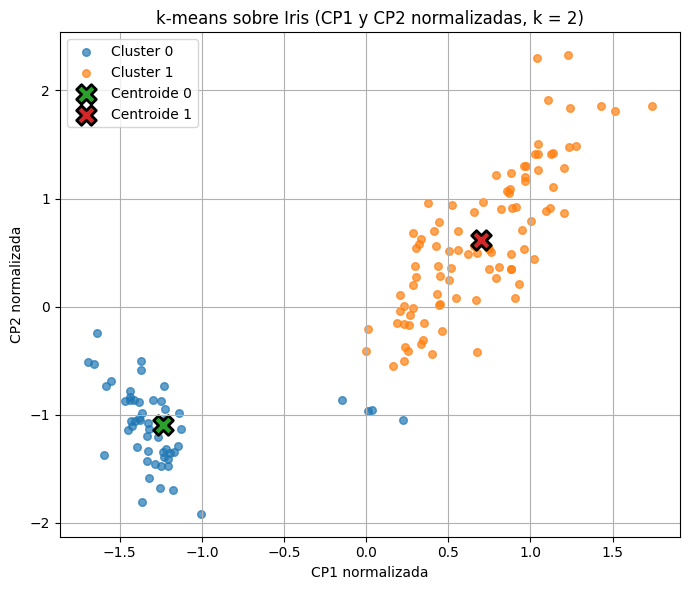


 Iteración 1 
  Centroide 0: [0.325449   0.01955543] | Puntos en cluster 0: 47
  Centroide 1: [-1.33847554 -1.10946041] | Puntos en cluster 1: 50
  Centroide 2: [0.97410705 1.02931916] | Puntos en cluster 2: 53

 Iteración 2 
  Centroide 0: [0.39913371 0.01421417] | Puntos en cluster 0: 52
  Centroide 1: [-1.33847554 -1.10946041] | Puntos en cluster 1: 50
  Centroide 2: [0.9618505  1.14028925] | Puntos en cluster 2: 48

 Iteración 3 
  Centroide 0: [0.4224224  0.06279176] | Puntos en cluster 0: 57
  Centroide 1: [-1.33847554 -1.10946041] | Puntos en cluster 1: 50
  Centroide 2: [0.99641163 1.20683466] | Puntos en cluster 2: 43

 Iteración 4 
  Centroide 0: [0.44239097 0.08675236] | Puntos en cluster 0: 60
  Centroide 1: [-1.33847554 -1.10946041] | Puntos en cluster 1: 50
  Centroide 2: [1.00950796 1.25669698] | Puntos en cluster 2: 40

 Iteración 5 
  Centroide 0: [0.45072364 0.10528329] | Puntos en cluster 0: 62
  Centroide 1: [-1.33847554 -1.10946041] | Puntos en cluster 1: 50
  Cen

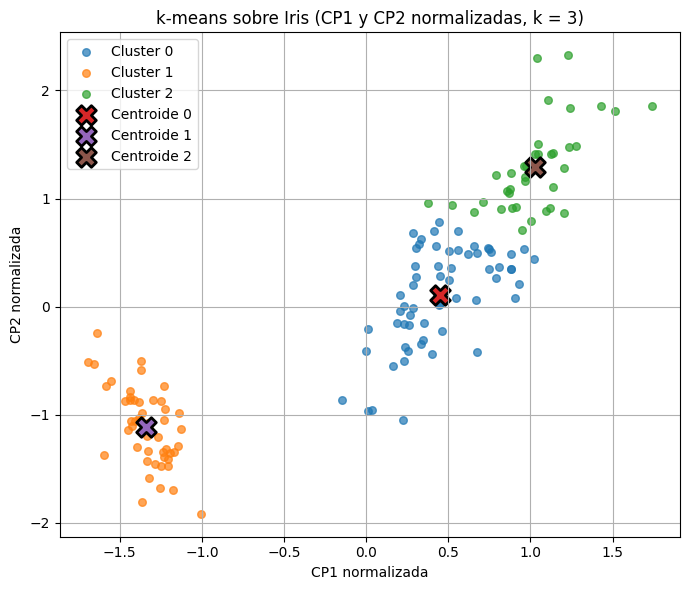


 Iteración 1 
  Centroide 0: [-1.34528442 -1.09299269] | Puntos en cluster 0: 49
  Centroide 1: [0.95350282 0.91141388] | Puntos en cluster 1: 48
  Centroide 2: [0.86563654 1.5302703 ] | Puntos en cluster 2: 9
  Centroide 3: [ 0.28091074 -0.09008312] | Puntos en cluster 3: 44

 Iteración 2 
  Centroide 0: [-1.33847554 -1.10946041] | Puntos en cluster 0: 50
  Centroide 1: [0.76906909 0.71620527] | Puntos en cluster 1: 40
  Centroide 2: [1.15275198 1.58022701] | Puntos en cluster 2: 20
  Centroide 3: [ 0.32764934 -0.11949326] | Puntos en cluster 3: 40

 Iteración 3 
  Centroide 0: [-1.33847554 -1.10946041] | Puntos en cluster 0: 50
  Centroide 1: [0.71736812 0.66314321] | Puntos en cluster 1: 43
  Centroide 2: [1.15163801 1.53894572] | Puntos en cluster 2: 22
  Centroide 3: [ 0.30688319 -0.19711266] | Puntos en cluster 3: 35

 Iteración 4 
  Centroide 0: [-1.33847554 -1.10946041] | Puntos en cluster 0: 50
  Centroide 1: [0.70029604 0.61501413] | Puntos en cluster 1: 46
  Centroide 2: [1

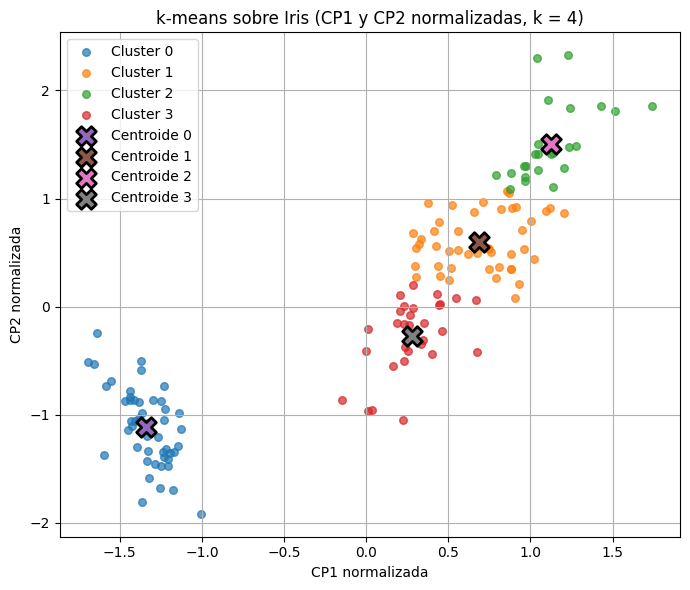

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv('iris.csv')

def reduccion_dimensional(iris):
    pw = iris['petal.width']
    pl = iris['petal.length']
    sw = iris['sepal.width']
    sl = iris['sepal.length']
    esp = iris['variety']

    cov = np.cov([pw, pl, sw, sl])

    eigenvalues, eigenvectors = np.linalg.eig(cov)
    idx = eigenvalues.argsort()[::-1]
    w = eigenvectors[idx[:2], :]

    cp1 = []
    cp2 = []

    for i in range(len(pw)):
        cp1.append(w[0,0]*pw[i] + w[0,1]*pl[i] + w[0,2]*sw[i] + w[0,3]*sl[i])
        cp2.append(w[1,0]*pw[i] + w[1,1]*pl[i] + w[1,2]*sw[i] + w[1,3]*sl[i])

    return np.array(cp1), np.array(cp2), esp

cp1, cp2, esp = reduccion_dimensional(iris)

# Normalización de las variables CP1 y CP2
cp1_norm = (cp1 - np.mean(cp1)) / np.std(cp1)
cp2_norm = (cp2 - np.mean(cp2)) / np.std(cp2)

# Matriz de datos normalizados en 2D
data_norm = np.column_stack((cp1_norm, cp2_norm))



# Funciones base

# Distancia euclidiana en n dimensiones
def distancia(punto, centroide):
    suma = 0.0
    for i in range(len(punto)):
        suma += (punto[i] - centroide[i])**2
    return np.sqrt(suma)


# Asignación de puntos a k clusters, según el centroide más cercano
def asignar_clusters(data, centroides):
    k = len(centroides)
    clusters = [[] for _ in range(k)]  # lista de listas

    for punto in data:
        # calcular distancia a cada centroide
        distancias = [distancia(punto, c) for c in centroides]
        # índice del centroide más cercano
        idx_min = int(np.argmin(distancias))
        clusters[idx_min].append(punto)

    # convertir cada lista a np.array
    clusters = [np.array(cluster) for cluster in clusters]
    return clusters


# Actualización de centroides con control de cambios por cluster
def actualizar_centroides(clusters, centroides_prev, clusters_prev):
    k = len(clusters)
    nuevos_centroides = []

    for i in range(k):
        # Si tenemos clusters_prev y este cluster no cambió, mantenemos el centroide
        if clusters_prev is not None and np.array_equal(clusters[i], clusters_prev[i]):
            nuevos_centroides.append(centroides_prev[i].copy())
        else:
            # Si el cluster tiene puntos, recalculamos la media
            if len(clusters[i]) > 0:
                nuevos_centroides.append(np.mean(clusters[i], axis=0))
            else:
                # Cluster vacío: mantenemos el centroide anterior
                nuevos_centroides.append(centroides_prev[i].copy())

    return nuevos_centroides


# Implementación general de k-means para n dimensiones y k clusters
def kmeans(data, centroides_iniciales, max_iters=20):
    centroides = [c.copy() for c in centroides_iniciales]
    clusters_prev = None
    k = len(centroides)

    for it in range(max_iters):
        print(f"\n Iteración {it+1} ")

        # Asignar puntos a los clusters
        clusters = asignar_clusters(data, centroides)

        # Actualizar centroides
        nuevos_centroides = actualizar_centroides(clusters, centroides, clusters_prev)

        # Mostrar info de esta iteración
        for i, c in enumerate(nuevos_centroides):
            n_puntos = len(clusters[i])
            print(f"  Centroide {i}: {c} | Puntos en cluster {i}: {n_puntos}")

        # 3) Verificar convergencia
        if clusters_prev is not None:
            sin_cambios = True
            for i in range(k):
                if not np.array_equal(clusters[i], clusters_prev[i]):
                    sin_cambios = False
                    break
            if sin_cambios:
                print("Convergencia alcanzada: ningún cluster cambió.")
                centroides = nuevos_centroides
                break

        # 4) Preparar siguiente iteración
        centroides = nuevos_centroides
        clusters_prev = [c.copy() for c in clusters]

    return centroides, clusters


# Inicialización aleatoria de centroides en 2D
def inicializar_centroides_aleatorios(data, k):
    centroides = []
    xmin, ymin = data.min(axis=0)
    xmax, ymax = data.max(axis=0)
    for i in range(k):
        cx = np.random.uniform(xmin, xmax)
        cy = np.random.uniform(ymin, ymax)
        centroides.append(np.array([cx, cy]))
    return centroides


# Ejecución de k-medias para k = 2, 3 y 4
for k in [2, 3, 4]:
    centroides_iniciales = inicializar_centroides_aleatorios(data_norm, k)
    centroides_finales, clusters_finales = kmeans(data_norm, centroides_iniciales)

    # Visualización
    plt.figure(figsize=(7, 6))

    for i, cluster in enumerate(clusters_finales):
        if len(cluster) == 0:
            continue
        plt.scatter(cluster[:, 0], cluster[:, 1], s=30, alpha=0.7, label=f"Cluster {i}")

    for i, c in enumerate(centroides_finales):
        plt.scatter(c[0], c[1], s=200, marker="X", edgecolor="black", linewidth=2, label=f"Centroide {i}")

    plt.title(f"k-means sobre Iris (CP1 y CP2 normalizadas, k = {k})")
    plt.xlabel("CP1 normalizada")
    plt.ylabel("CP2 normalizada")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
